In [ ]:
import cv2

def extract_face_from_video(video_path, output_folder_path, haar):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + haar)
    cap = cv2.VideoCapture(video_path)
    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        for (x, y, w, h) in faces:
            face_image = frame[y:y+h, x:x+w]
            cv2.imwrite(output_folder_path + "/face%d.jpg" % count, face_image)
            count += 1
    cap.release()


: 

In [14]:
def extract_face_from_video(video_path, output_folder_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    if face_cascade.empty():
        raise Exception("Failed to load face cascade classifier file")
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise Exception("Failed to open video file")
    
    count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        
        for (x, y, w, h) in faces:
            face_image = frame[y:y+h, x:x+w]
            cv2.imwrite(output_folder_path + "/face%d.jpg" % count, face_image)
            count += 1
    
    cap.release()


In [15]:
video_path = 'C:/Users/harry/OneDrive/Documents/Production_Lib/except_heartPred/videos/camIGDTUW_trial_008.avi'
output_folder = 'C:/Users/harry/OneDrive/Documents/Production_Lib/except_heartPred/face_image'
haar = 'C:/Users/harry/OneDrive/Documents/Production_Lib/except_heartPred/haarcascades/haarcascade_frontalface_default.xml'
extract_face_from_video(video_path, output_folder)

In [29]:
from deepface import DeepFace
DeepFace.analyze(r'C:\Users\harry\OneDrive\Documents\Production_Lib\except_heartPred\face_image\face0.jpg')

Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


Action: age:  25%|██▌       | 1/4 [00:00<00:00,  9.17it/s]    

1/1 [==============================] - 0s 194ms/step


Action: gender:  50%|█████     | 2/4 [00:00<00:00,  4.77it/s]

1/1 [==============================] - 0s 215ms/step


Action: race:  75%|███████▌  | 3/4 [00:00<00:00,  4.21it/s]  

1/1 [==============================] - 0s 221ms/step


Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]


{'emotion': {'angry': 2.796810747440759e-05,
  'disgust': 4.5478643402228056e-17,
  'fear': 3.1605949857294036e-06,
  'happy': 3.665356212989579e-09,
  'sad': 0.0015072863789100666,
  'surprise': 1.098509894159605e-08,
  'neutral': 99.9984622001648},
 'dominant_emotion': 'neutral',
 'region': {'x': 13, 'y': 13, 'w': 231, 'h': 231},
 'age': 22,
 'gender': 'Man',
 'race': {'asian': 0.5939943250268698,
  'indian': 90.27718901634216,
  'black': 2.9724745079874992,
  'white': 0.2925622509792447,
  'middle eastern': 0.278614554554224,
  'latino hispanic': 5.585167557001114},
 'dominant_race': 'indian'}

Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

1/1 [==============================] - 1s 943ms/step


Action: gender:  25%|██▌       | 1/4 [00:01<00:03,  1.26s/it]

1/1 [==============================] - 1s 951ms/step


Action: race:  50%|█████     | 2/4 [00:02<00:02,  1.14s/it]  

1/1 [==============================] - 1s 846ms/step


Action: emotion:  75%|███████▌  | 3/4 [00:03<00:01,  1.05s/it]

1/1 [==============================] - 0s 73ms/step


Action: emotion: 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


{'age': 22, 'region': {'x': 13, 'y': 13, 'w': 231, 'h': 231}, 'gender': 'Man', 'race': {'asian': 0.5939943250268698, 'indian': 90.27718901634216, 'black': 2.9724745079874992, 'white': 0.2925622509792447, 'middle eastern': 0.278614554554224, 'latino hispanic': 5.585167557001114}, 'dominant_race': 'indian', 'emotion': {'angry': 2.796810747440759e-05, 'disgust': 4.5478643402228056e-17, 'fear': 3.1605949857294036e-06, 'happy': 3.665356212989579e-09, 'sad': 0.0015072863789100666, 'surprise': 1.098509894159605e-08, 'neutral': 99.9984622001648}, 'dominant_emotion': 'neutral'}


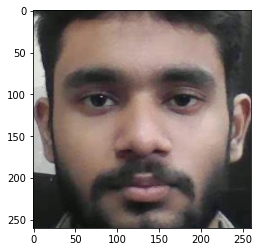

In [22]:
from deepface import DeepFace
import matplotlib.pyplot as plt

img_path = 'face_image/face0.jpg'
result = DeepFace.analyze(img_path, actions=['age', 'gender', 'race', 'emotion'])

print(result)

plt.imshow(plt.imread(img_path))
plt.show()


## VIDEO FACE

In [ ]:
from deepface import DeepFace
import cv2

cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    result = DeepFace.analyze(frame, actions=['age', 'gender', 'race', 'emotion'])
    print(result)

cap.release()


In [26]:
from deepface import DeepFace as df
import matplotlib.pyplot as plt
import numpy as np
from rich import traceback
traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x0000017D38A51D08>>

In [24]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [27]:
def actions(img_path):
  actions=('emotion', 'age', 'gender', 'race')
  img = plt.imread(img_path)
  obj  = df.analyze(img)
  print("Age: ", obj["age"])
  print("Emotion: ", obj["dominant_emotion"])
  print("Gender: ", obj["gender"])
  print("Race: ", obj["dominant_race"])
  print('─' * 10) 


def face_detector(img_path):
  backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']
  face = df.detectFace(img_path = img_path, target_size = (224, 224), detector_backend = backends[4])

def display_img(img):
  img = plt.imread(img)
  plt.imshow(img)
  plt.show()

INPUT IMAGE



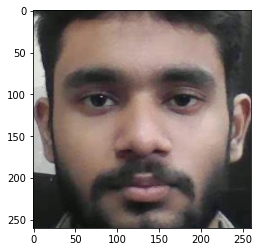


PREDICTED ATTRIBUTES OF THE IMAGE



Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


Action: age:  25%|██▌       | 1/4 [00:00<00:01,  1.50it/s]    

1/1 [==============================] - 0s 233ms/step


Action: gender:  50%|█████     | 2/4 [00:00<00:00,  2.16it/s]

1/1 [==============================] - 0s 264ms/step


Action: race:  75%|███████▌  | 3/4 [00:01<00:00,  2.55it/s]  

1/1 [==============================] - 0s 209ms/step


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]


Age:  23
Emotion:  neutral
Gender:  Man
Race:  indian
──────────


In [28]:
img = 'face_image/face0.jpg'
print(color.BOLD + 'INPUT IMAGE' + color.END)
print("")
display_img(img)
print("")
print(color.BOLD + 'PREDICTED ATTRIBUTES OF THE IMAGE' + color.END)
print("")
actions(img)